<a href="https://colab.research.google.com/github/mylesm9/Business-Analytics-/blob/main/Intermediary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Directory, Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Python Business Analysis/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Python Business Analysis/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [2]:
# Libraries 

In [3]:
import pandas as pd
import scipy.stats as  st
import math as m
import statsmodels.stats.api as sm

In [4]:
# Load The Data

In [6]:
df = pd.read_csv( "Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Normal Disrubution 

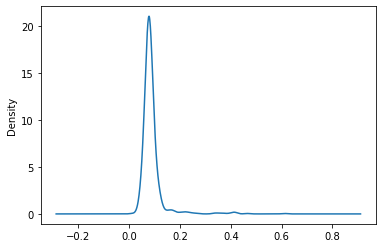

In [8]:
# Density Plot of Cholrides 
df.chlorides.plot.density ()

In [9]:
# Check of number of observation within  x Standrad Deviations 

In [16]:
df.loc [(df.chlorides <= df.chlorides.mean() +1 * df.chlorides.std()) & (df.chlorides >= df.chlorides.mean () -1 * df.chlorides.std())].chlorides.count()/ df.chlorides.count()

0.9480925578486554

In [17]:
# Course Exersice: What is the share of observations within 3 standard Deviations of Alcohol

In [21]:
df.loc [(df.alcohol <= df.alcohol.mean() +3 * df.alcohol.std()) & (df.alcohol >= df.alcohol.mean () -3 * df.alcohol.std())].alcohol.count( )/ df.alcohol.count()

0.9949968730456535

In [23]:
# plot alcohol distribution 

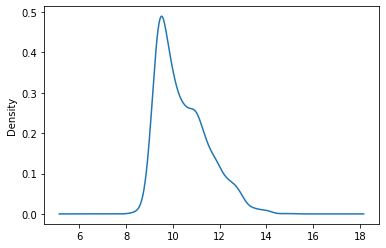

In [24]:
df.alcohol.plot.density()

In [25]:
# Check how many observations are within 3 deviations 

In [31]:
df.loc [( df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std ()) & 
            (df.alcohol >= df.alcohol.mean () -3 * df.alcohol.std ())].alcohol.count () / df. alcohol.count ()

0.9949968730456535

In [32]:
# Check how many observations are within 2 deviations 

In [34]:
df.loc [( df.alcohol <= df.alcohol.mean() + 2 * df.alcohol.std ()) & 
            (df.alcohol >= df.alcohol.mean () -2 * df.alcohol.std ())].alcohol.count () / df. alcohol.count ()

0.9562226391494684

In [36]:
# Check how many observations are within 1 deviation

In [38]:
df.loc [( df.alcohol <= df.alcohol.mean() + 1 * df.alcohol.std ()) & 
            (df.alcohol >= df.alcohol.mean () -1 * df.alcohol.std ())].alcohol.count () / df. alcohol.count ()

0.7035647279549718

# Shapiro - Wilks Test 

In [39]:
# Shapiro- Wiks for normality

In [58]:
stat , p = st.shapiro (df.chlorides)
print (p)

0.0


In [59]:
# Condition

In [60]:
if p > 0.05:
  # If yes
    print ("Sample looks Gaussain or Normal (Fail to Reject H0)")
    # If not
else: 
  print("Sample does not look Gaussain or Normal (Reject H0)") 

Sample does not look Gaussain or Normal (Reject H0)


In [61]:
# Course Exersice : Do the Shapiro - Wilk Test for Sulphates and create an if else condition

In [62]:
stat , p = st.shapiro (df.sulphates)
print(p)

5.821617678881608e-38


In [63]:
if p > 0.05:
  print ("Sample looks Gaussain or Normal (Fail to Reject H0)")
else : 
  print( "Sample does not look Gaussain or Normal (Reject H0)")
  

Sample does not look Gaussain or Normal (Reject H0)


# Standard Error

In [66]:
# Using a Function 
st.sem (df.alcohol)

0.026650018979018173

In [65]:
# Computations - Standard deviations divided by square root of observations

In [67]:
df.alcohol.std ( ) /  m .sqrt(df.alcohol.count())

0.026650018979018173

In [69]:
# Course Exersice: Standard Error of pH

In [70]:
st.sem (df.pH)

0.0038608683325203784

In [71]:
# Computation

In [76]:
df.pH.std () / m.sqrt(df.pH.count())

0.0038608683325203784

# Confidence Interval

In [77]:
# Confidence Internal of the mean of citric acid 

In [94]:
print (df[['citric acid']] .mean ())
st. norm.interval(alpha = 0.95, 
                  loc =  df[['citric acid']] .mean(), 
                  scale = st. sem (df[['citric acid']]) )

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

In [95]:
# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5974ec610>]],
      dtype=object)

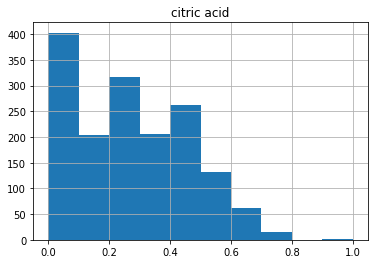

In [100]:
df [['citric acid']] .hist()

In [101]:
# Course Exersice: Do CI of Desity mean and make a Histogram

In [110]:
print (df[['density']].mean ())
st.norm.interval (alpha = 0.95,
                 loc = df[['density']] .mean(),
                 scale = st.sem(df[['density']]))

density    0.996747
dtype: float64


(array([0.99665417]), array([0.99683919]))

In [111]:
# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff596a98790>]],
      dtype=object)

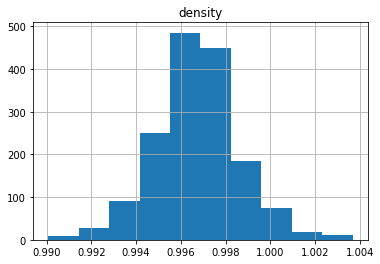

In [112]:
df[['density']].hist()

# T-Test

In [113]:
# Load Data

In [115]:
data = pd.read_csv ("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
# Subset UK & German Salaries

In [154]:
salary_uk =  data.loc [data. Country == 'United Kingdom']. Salary
salary_de = data.loc [data.Country  == 'Germany'].Salary

In [155]:
# T Test

In [156]:
stat, p = st.ttest_ind( a= salary_uk, b= salary_de)
print(p)

0.026389999555203502


In [157]:
if p > 0.05:
  print ('Both countries have similar salaries (fail to reject H0)')
else: 
  print ( 'There is a difference')

There is a difference


In [158]:
# Course Exersice: T Test in experiance between India and USA

In [159]:
# Create the subsets

In [173]:
in_experiance = data.loc [data.Country == 'India'].YearsCodedJob
us_experiance = data.loc [data.Country == 'United States']. YearsCodedJob

In [162]:
# The T Test 

In [175]:
stat, p = st.ttest_ind (a=in_experiance, b= us_experiance)
print(p)
if p > 0.05:
  print('Groups are similar (fail to reject H0)')
else: 
  print (' Groups are different (Reject h0) ')

5.225676347614714e-58
 Groups are different (Reject h0) 


In [164]:
# Histograms

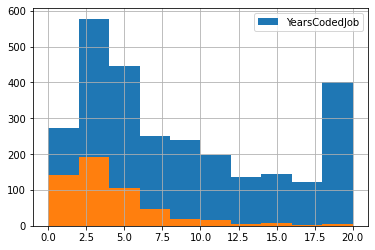

In [176]:
us_experiance.hist (legend= True) 
in_experiance.hist ()

# Chi-Square Test

In [178]:
# cross tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [183]:
# Chi square test
chi2, p, dof,exp =st.chi2_contingency(tab)
print(p)
if p > 0.05 :
  print('There is no relationship (Fail to reject H0)')
else:
  print('There is a strong relationship (Reject H0)')

3.321120877301216e-16
There is a strong relationship (Reject H0)


In [184]:
# Course Exersice: Chi Square Test between company size and hobbies 

In [185]:
# Cross Tabulation

In [188]:
tab = pd.crosstab(index = data.CompanySizeNumber,
                  columns = data.Hobby )
tab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [189]:
# Chi Square Test 

In [192]:
chi2, p, dof, exp = st.chi2_contingency (tab)
print(p)
if p > 0.05:
  print (' There is no relationship (Failed to Rejaect Ho)')
else:
  print('There is a strong relationship (Reject H0)')

0.025708455559671047
There is a strong relationship (Reject H0)
